# House Price Prediction Analysis

# 1 Data Cleaning

## 1.1 Loading Dataset

In [1]:
import pandas as pd

df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 1.2 Analyzing Dataset

In [2]:
for col in df.columns:
    print(df[col])

0          1
1          2
2          3
3          4
4          5
        ... 
2925    2926
2926    2927
2927    2928
2928    2929
2929    2930
Name: Order, Length: 2930, dtype: int64
0       526301100
1       526350040
2       526351010
3       526353030
4       527105010
          ...    
2925    923275080
2926    923276100
2927    923400125
2928    924100070
2929    924151050
Name: PID, Length: 2930, dtype: int64
0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2930, dtype: int64
0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: object
0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64
0       31770
1       11622
2       14267
3  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## 1.3 Feature Analysis

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','-')

In [5]:
for col in df.select_dtypes(include = 'object').columns:
    print(df[col].value_counts())
    print('-'*50)

ms-zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64
--------------------------------------------------
street
Pave    2918
Grvl      12
Name: count, dtype: int64
--------------------------------------------------
alley
Grvl    120
Pave     78
Name: count, dtype: int64
--------------------------------------------------
lot-shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64
--------------------------------------------------
land-contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
--------------------------------------------------
utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
--------------------------------------------------
lot-config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64
--------------------------------------------------
land-slope


In [6]:
df.columns.tolist()

['order',
 'pid',
 'ms-subclass',
 'ms-zoning',
 'lot-frontage',
 'lot-area',
 'street',
 'alley',
 'lot-shape',
 'land-contour',
 'utilities',
 'lot-config',
 'land-slope',
 'neighborhood',
 'condition-1',
 'condition-2',
 'bldg-type',
 'house-style',
 'overall-qual',
 'overall-cond',
 'year-built',
 'year-remod/add',
 'roof-style',
 'roof-matl',
 'exterior-1st',
 'exterior-2nd',
 'mas-vnr-type',
 'mas-vnr-area',
 'exter-qual',
 'exter-cond',
 'foundation',
 'bsmt-qual',
 'bsmt-cond',
 'bsmt-exposure',
 'bsmtfin-type-1',
 'bsmtfin-sf-1',
 'bsmtfin-type-2',
 'bsmtfin-sf-2',
 'bsmt-unf-sf',
 'total-bsmt-sf',
 'heating',
 'heating-qc',
 'central-air',
 'electrical',
 '1st-flr-sf',
 '2nd-flr-sf',
 'low-qual-fin-sf',
 'gr-liv-area',
 'bsmt-full-bath',
 'bsmt-half-bath',
 'full-bath',
 'half-bath',
 'bedroom-abvgr',
 'kitchen-abvgr',
 'kitchen-qual',
 'totrms-abvgrd',
 'functional',
 'fireplaces',
 'fireplace-qu',
 'garage-type',
 'garage-yr-blt',
 'garage-finish',
 'garage-cars',
 'garage-

In [7]:
df.drop(columns = ['order','pid'],axis = 1, inplace = True)

In [8]:
df['ms-zoning'] = df['ms-zoning'].replace(['C (all)','I (all)','A (agr)'],'Other')

In [9]:
df['utilities'] = df['utilities'].replace(['NoSewr','NoSeWa'],'Other')

In [10]:
for col in df.select_dtypes(include = 'object').columns:
    print(df[col].value_counts())
    print('-'*50)

ms-zoning
RL       2273
RM        462
FV        139
Other      29
RH         27
Name: count, dtype: int64
--------------------------------------------------
street
Pave    2918
Grvl      12
Name: count, dtype: int64
--------------------------------------------------
alley
Grvl    120
Pave     78
Name: count, dtype: int64
--------------------------------------------------
lot-shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64
--------------------------------------------------
land-contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
--------------------------------------------------
utilities
AllPub    2927
Other        3
Name: count, dtype: int64
--------------------------------------------------
lot-config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64
--------------------------------------------------
land-slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: i

## 1.4 Handling Duplicates

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

## 1.5 Splitting Dataset

In [13]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = 'saleprice')
y = df['saleprice']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## 1.6 Handling Missing Values

In [14]:
missing_values = x_train.isnull().mean() * 100
missing_columns = missing_values[missing_values > 0]

missing_columns

lot-frontage      16.766212
alley             93.088737
mas-vnr-type      60.836177
mas-vnr-area       0.810580
bsmt-qual          2.602389
bsmt-cond          2.602389
bsmt-exposure      2.687713
bsmtfin-type-1     2.602389
bsmtfin-sf-1       0.042662
bsmtfin-type-2     2.645051
bsmtfin-sf-2       0.042662
bsmt-unf-sf        0.042662
total-bsmt-sf      0.042662
bsmt-full-bath     0.042662
bsmt-half-bath     0.042662
fireplace-qu      48.805461
garage-type        5.119454
garage-yr-blt      5.204778
garage-finish      5.204778
garage-cars        0.042662
garage-area        0.042662
garage-qual        5.204778
garage-cond        5.204778
pool-qc           99.488055
fence             79.948805
misc-feature      95.989761
dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1.7 Checking Relationship b/w Neighborhod and Lot-frontage

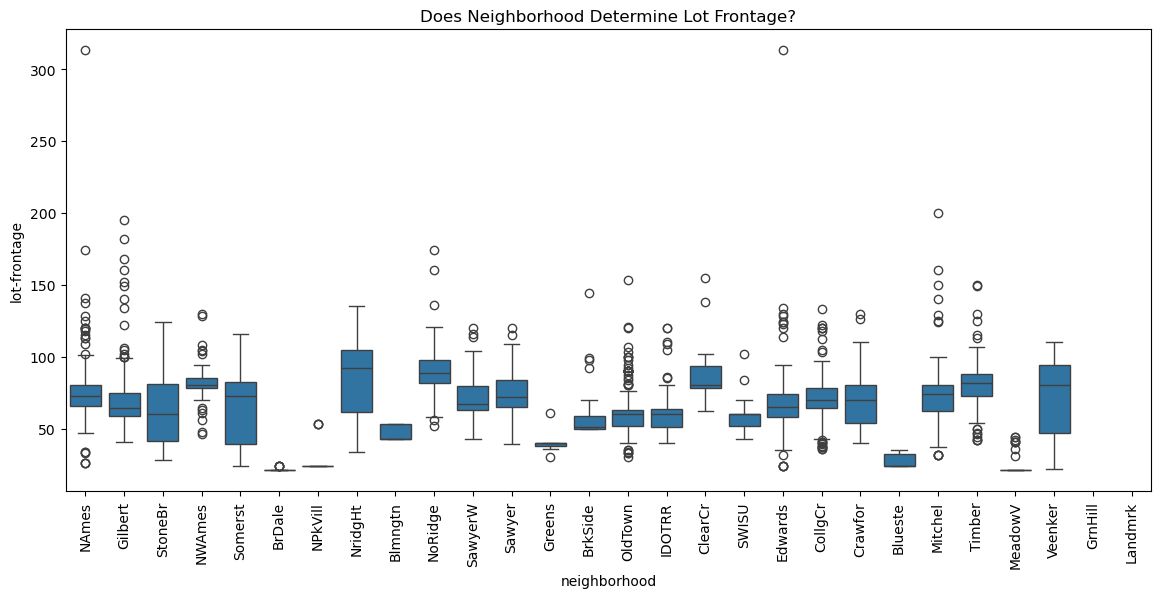

In [16]:

plt.figure(figsize=(14, 6)) # Make it wide so text fits
sns.boxplot(x = df['neighborhood'],y=df['lot-frontage'])
plt.xticks(rotation=90) # Rotate labels so they don't overlap
plt.title("Does Neighborhood Determine Lot Frontage?")
plt.show()

In [17]:
df.groupby('neighborhood')['lot-frontage'].mean()

neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: lot-frontage, dtype: float64

In [18]:
num_cols = [col for col in x_train.columns if x_train[col].dtype != 'object']
num_cols

['ms-subclass',
 'lot-frontage',
 'lot-area',
 'overall-qual',
 'overall-cond',
 'year-built',
 'year-remod/add',
 'mas-vnr-area',
 'bsmtfin-sf-1',
 'bsmtfin-sf-2',
 'bsmt-unf-sf',
 'total-bsmt-sf',
 '1st-flr-sf',
 '2nd-flr-sf',
 'low-qual-fin-sf',
 'gr-liv-area',
 'bsmt-full-bath',
 'bsmt-half-bath',
 'full-bath',
 'half-bath',
 'bedroom-abvgr',
 'kitchen-abvgr',
 'totrms-abvgrd',
 'fireplaces',
 'garage-yr-blt',
 'garage-cars',
 'garage-area',
 'wood-deck-sf',
 'open-porch-sf',
 'enclosed-porch',
 '3ssn-porch',
 'screen-porch',
 'pool-area',
 'misc-val',
 'mo-sold',
 'yr-sold']

## 1.8 Identifying Outliers

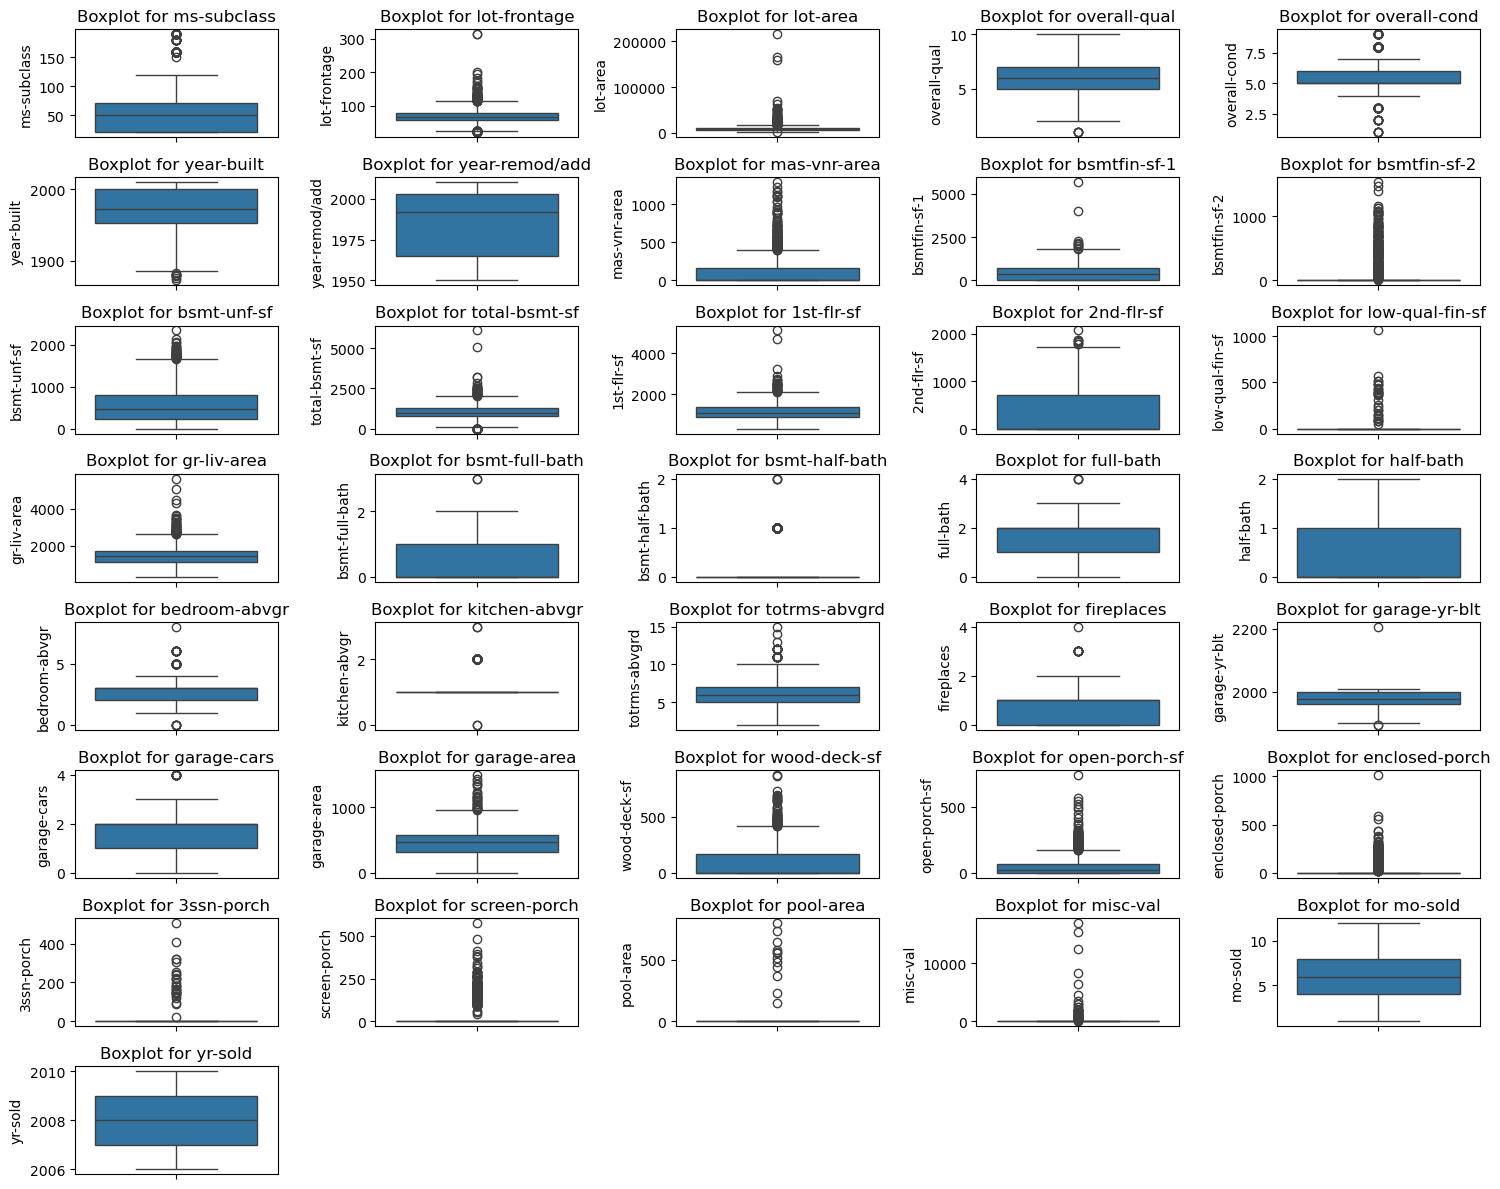

In [19]:
plt.figure(figsize = (15,12))
n_cols = len(num_cols)
n_rows = (n_cols + 5) // 5 
for i, col in enumerate(num_cols):
    plt.subplot(n_rows,5,i+1)
    plt.title(f'Boxplot for {col}')
    sns.boxplot(y = x_train[col],data=x_train[num_cols])
    plt.tight_layout()
    

In [20]:
outlier_exception = ['order','pid','year-remod/add','half-bath','mo-sold','yr-sold']
outlier_cols = [col for col in num_cols if col not in outlier_exception]
outlier_cols

['ms-subclass',
 'lot-frontage',
 'lot-area',
 'overall-qual',
 'overall-cond',
 'year-built',
 'mas-vnr-area',
 'bsmtfin-sf-1',
 'bsmtfin-sf-2',
 'bsmt-unf-sf',
 'total-bsmt-sf',
 '1st-flr-sf',
 '2nd-flr-sf',
 'low-qual-fin-sf',
 'gr-liv-area',
 'bsmt-full-bath',
 'bsmt-half-bath',
 'full-bath',
 'bedroom-abvgr',
 'kitchen-abvgr',
 'totrms-abvgrd',
 'fireplaces',
 'garage-yr-blt',
 'garage-cars',
 'garage-area',
 'wood-deck-sf',
 'open-porch-sf',
 'enclosed-porch',
 '3ssn-porch',
 'screen-porch',
 'pool-area',
 'misc-val']

## 1.9 Custom Transformers

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class GroupImputer(BaseEstimator,TransformerMixin):
    def __init__(self,neighbour,target):
        self.neighbour = neighbour
        self.target = target
        self.fill = None
    def fit(self,x,y=None):
        self.fill = x.groupby(self.neighbour)[self.target].mean()
        return self
    def transform(self,x):
        x = x.copy()
        replaced_values = x[self.neighbour].map(self.fill)
        x[self.target] = x[self.target].fillna(replaced_values)
        return x


In [22]:
class Outlier(BaseEstimator, TransformerMixin):
    def __init__(self, factor, target):
        self.factor = factor
        self.target = target
        self.boundary = {}

    def fit(self, X, y=None):
        q1 = X[self.target].quantile(0.25)
        q3 = X[self.target].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - (self.factor * iqr)
        upper = q3 + (self.factor * iqr)

        self.boundary[self.target] = (lower, upper)
        return self

    def transform(self, X):
        X = X.copy()
        for col, (lower, upper) in self.boundary.items():
            X[col] = X[col].clip(lower=lower, upper=upper)
        return X


- What it does: This is a context-aware imputer that fills missing values using group-specific averages rather than a global average. This leads to more accurate data estimation.

- How it works:

- Fit (fit): The transformer groups the data by a specific category (e.g., Neighborhood) and calculates the mean of the target column (e.g., LotFrontage) for each group. It stores these averages as a reference.

- Transform (transform): It scans the target column for missing values. If a value is missing, it looks up the category of that row and fills the gap with the corresponding group average computed earlier. Existing values are left untouched.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms-subclass      2930 non-null   int64  
 1   ms-zoning        2930 non-null   object 
 2   lot-frontage     2440 non-null   float64
 3   lot-area         2930 non-null   int64  
 4   street           2930 non-null   object 
 5   alley            198 non-null    object 
 6   lot-shape        2930 non-null   object 
 7   land-contour     2930 non-null   object 
 8   utilities        2930 non-null   object 
 9   lot-config       2930 non-null   object 
 10  land-slope       2930 non-null   object 
 11  neighborhood     2930 non-null   object 
 12  condition-1      2930 non-null   object 
 13  condition-2      2930 non-null   object 
 14  bldg-type        2930 non-null   object 
 15  house-style      2930 non-null   object 
 16  overall-qual     2930 non-null   int64  
 17  overall-cond  

In [24]:
df['garage-finish'].value_counts()

garage-finish
Unf    1231
RFn     812
Fin     728
Name: count, dtype: int64

## 1.10 Lists Extraction

In [25]:
missing_object = [col for col in missing_columns.index if x_train[col].dtype == 'object']
cat_exception = ['electrical']
col_to_none = [col for col in missing_object if col not in cat_exception]
col_to_none

['alley',
 'mas-vnr-type',
 'bsmt-qual',
 'bsmt-cond',
 'bsmt-exposure',
 'bsmtfin-type-1',
 'bsmtfin-type-2',
 'fireplace-qu',
 'garage-type',
 'garage-finish',
 'garage-qual',
 'garage-cond',
 'pool-qc',
 'fence',
 'misc-feature']

In [26]:
missing_num = [col for col in missing_columns.index if x_train[col].dtype != 'object' ]
num_exception = ['lot-frontage']
col_to_zero = [col for col in missing_num if col not in num_exception]
col_to_zero

['mas-vnr-area',
 'bsmtfin-sf-1',
 'bsmtfin-sf-2',
 'bsmt-unf-sf',
 'total-bsmt-sf',
 'bsmt-full-bath',
 'bsmt-half-bath',
 'garage-yr-blt',
 'garage-cars',
 'garage-area']

In [27]:
num_cols = x_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x_train.select_dtypes(include='object').columns.tolist()

In [28]:
ordinal_features = [
    'lot-shape',
    'land-slope',

    'exter-qual',
    'exter-cond',

    'bsmt-qual',
    'bsmt-cond',
    'bsmt-exposure',
    'bsmtfin-type-1',
    'bsmtfin-type-2',

    'heating-qc',
    'kitchen-qual',
    'functional',
    'fireplace-qu',

    'garage-finish',
    'garage-qual',
    'garage-cond',

    'paved-drive',
    'pool-qc',
    'fence'
]


In [29]:
nominal_features = [
    'ms-zoning',
    'street',
    'alley',
    'land-contour',
    'utilities',
    'lot-config',
    'neighborhood',
    'condition-1',
    'condition-2',
    'bldg-type',
    'house-style',
    'roof-style',
    'roof-matl',
    'exterior-1st',
    'exterior-2nd',
    'mas-vnr-type',
    'foundation',
    'heating',
    'central-air',
    'electrical',
    'garage-type',
    'misc-feature',
    'sale-type',
    'sale-condition'
]


# 2 Feature Engineering 

In [30]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
sklearn.set_config(transform_output="pandas")



## 2.1 Custom Transformer Execution

In [31]:
col_to_zero_imputer = SimpleImputer(strategy='constant',fill_value=0)
x_train[col_to_zero] = col_to_zero_imputer.fit_transform(x_train[col_to_zero])
x_test[col_to_zero] = col_to_zero_imputer.transform(x_test[col_to_zero])

In [32]:
group_imputer = GroupImputer(neighbour='neighborhood', target='lot-frontage')

x_train = group_imputer.fit_transform(x_train)
x_test = group_imputer.transform(x_test)


In [33]:
for col in outlier_cols:
    outlier_handler = Outlier(factor=1.5, target=col)
    x_train[[col]] = outlier_handler.fit_transform(x_train[[col]])
    x_test[[col]] = outlier_handler.transform(x_test[[col]])

In [34]:
col_to_none_imputer = SimpleImputer(strategy='constant',fill_value='No')
x_train[col_to_none] = col_to_none_imputer.fit_transform(x_train[col_to_none])
x_test[col_to_none] = col_to_none_imputer.transform(x_test[col_to_none])

In [35]:
cat_exception_imputer = SimpleImputer(strategy='most_frequent')
x_train[cat_exception] = cat_exception_imputer.fit_transform(x_train[cat_exception])
x_test[cat_exception] = cat_exception_imputer.transform(x_test[cat_exception])

In [36]:
for col in x_train.select_dtypes(include = 'object'):
    print(x_train[col].value_counts())
    print('-'*50)

ms-zoning
RL       1818
RM        371
FV        106
Other      25
RH         24
Name: count, dtype: int64
--------------------------------------------------
street
Pave    2333
Grvl      11
Name: count, dtype: int64
--------------------------------------------------
alley
No      2182
Grvl     100
Pave      62
Name: count, dtype: int64
--------------------------------------------------
lot-shape
Reg    1496
IR1     782
IR2      53
IR3      13
Name: count, dtype: int64
--------------------------------------------------
land-contour
Lvl    2109
HLS      97
Bnk      89
Low      49
Name: count, dtype: int64
--------------------------------------------------
utilities
AllPub    2341
Other        3
Name: count, dtype: int64
--------------------------------------------------
lot-config
Inside     1716
Corner      420
CulDSac     137
FR2          60
FR3          11
Name: count, dtype: int64
--------------------------------------------------
land-slope
Gtl    2228
Mod     102
Sev      14
Name: 

In [37]:
x_train.isnull().sum()

ms-subclass       0
ms-zoning         0
lot-frontage      3
lot-area          0
street            0
                 ..
misc-val          0
mo-sold           0
yr-sold           0
sale-type         0
sale-condition    0
Length: 79, dtype: int64

## 2.2 Feature Encoding

### 2.2.1 Nominal Encoding

In [38]:
len(cat_cols)

43

In [39]:
nominal_step = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), nominal_features)
    ],
    remainder='passthrough', 
    verbose_feature_names_out=False 
)
x_train = nominal_step.fit_transform(x_train)
x_test = nominal_step.transform(x_test)


### 2.2.2 Ordinal Encoding

In [40]:
qual_order = ['No','Po', 'Fa', 'TA', 'Gd', 'Ex']
lot_shape_order = ['IR3', 'IR2', 'IR1', 'Reg']
land_slope_order = ['Sev', 'Mod', 'Gtl']
bsmt_exposure_order = ['No', 'Mn', 'Av', 'Gd']
bsmt_finish_order = ['No','Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
functional_order = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
garage_finish_order = ['No','Unf', 'RFn', 'Fin']
paved_drive_order = ['N', 'P', 'Y']
fence_order = ['No','MnWw', 'GdWo', 'MnPrv', 'GdPrv']


In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(
    categories=[
        lot_shape_order,          
        land_slope_order,         

        qual_order,               
        qual_order,               

        qual_order,               
        qual_order,               
        bsmt_exposure_order,      
        bsmt_finish_order,        
        bsmt_finish_order,        

        qual_order,               
        qual_order,               
        functional_order,         
        qual_order,               

        garage_finish_order,      
        qual_order,               
        qual_order,              

        paved_drive_order,        
        qual_order,               
        fence_order               
    ],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)


In [42]:

ordinal_step = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_features)
    ],
    remainder='passthrough', 
    verbose_feature_names_out=False 
)
x_train = ordinal_step.fit_transform(x_train)
x_test = ordinal_step.transform(x_test)


In [43]:
x_train.head()

,lot-shape,land-slope,exter-qual,exter-cond,bsmt-qual,bsmt-cond,bsmt-exposure,bsmtfin-type-1,bsmtfin-type-2,heating-qc,...,garage-area,wood-deck-sf,open-porch-sf,enclosed-porch,3ssn-porch,screen-porch,pool-area,misc-val,mo-sold,yr-sold
381,3.0,2.0,3.0,3.0,4.0,3.0,0.0,1.0,1.0,3.0,...,479.0,0,0,0,0,0,0,0,6,2009
834,1.0,0.0,3.0,3.0,3.0,4.0,3.0,2.0,5.0,3.0,...,538.0,420,0,0,0,0,0,0,6,2009
1898,3.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,...,462.0,0,0,0,0,0,0,0,3,2007
678,3.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,...,420.0,0,0,0,0,0,0,0,6,2009
700,3.0,2.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,4.0,...,0.0,0,0,0,0,0,0,0,10,2009


## 2.3 Feature Scaling

In [44]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
scaling = StandardScaler()
x_train_scaled[num_cols] = scaling.fit_transform(x_train[num_cols])
x_test_scaled[num_cols] = scaling.transform(x_test[num_cols])

In [45]:
x_train.dropna(axis = 0,inplace=True)
y_train = y_train.loc[x_train.index]
x_train_scaled.dropna(axis = 0,inplace=True)
y_train = y_train.loc[x_train_scaled.index]

In [46]:
x_train.isnull().sum()

lot-shape       0
land-slope      0
exter-qual      0
exter-cond      0
bsmt-qual       0
               ..
screen-porch    0
pool-area       0
misc-val        0
mo-sold         0
yr-sold         0
Length: 232, dtype: int64

In [47]:
x_train_scaled.isnull().sum()

lot-shape       0
land-slope      0
exter-qual      0
exter-cond      0
bsmt-qual       0
               ..
screen-porch    0
pool-area       0
misc-val        0
mo-sold         0
yr-sold         0
Length: 232, dtype: int64

In [48]:
x_train.head()

,lot-shape,land-slope,exter-qual,exter-cond,bsmt-qual,bsmt-cond,bsmt-exposure,bsmtfin-type-1,bsmtfin-type-2,heating-qc,...,garage-area,wood-deck-sf,open-porch-sf,enclosed-porch,3ssn-porch,screen-porch,pool-area,misc-val,mo-sold,yr-sold
381,3.0,2.0,3.0,3.0,4.0,3.0,0.0,1.0,1.0,3.0,...,479.0,0,0,0,0,0,0,0,6,2009
834,1.0,0.0,3.0,3.0,3.0,4.0,3.0,2.0,5.0,3.0,...,538.0,420,0,0,0,0,0,0,6,2009
1898,3.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,...,462.0,0,0,0,0,0,0,0,3,2007
678,3.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,...,420.0,0,0,0,0,0,0,0,6,2009
700,3.0,2.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,4.0,...,0.0,0,0,0,0,0,0,0,10,2009


In [49]:
x_train_scaled.head()

,lot-shape,land-slope,exter-qual,exter-cond,bsmt-qual,bsmt-cond,bsmt-exposure,bsmtfin-type-1,bsmtfin-type-2,heating-qc,...,garage-area,wood-deck-sf,open-porch-sf,enclosed-porch,3ssn-porch,screen-porch,pool-area,misc-val,mo-sold,yr-sold
381,3.0,2.0,3.0,3.0,4.0,3.0,0.0,1.0,1.0,3.0,...,0.060050,-0.790566,-0.81229,0.0,0.0,0.0,0.0,0.0,-0.068220,0.916619
834,1.0,0.0,3.0,3.0,3.0,4.0,3.0,2.0,5.0,3.0,...,0.346886,2.832889,-0.81229,0.0,0.0,0.0,0.0,0.0,-0.068220,0.916619
1898,3.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,...,-0.022598,-0.790566,-0.81229,0.0,0.0,0.0,0.0,0.0,-1.176118,-0.604482
678,3.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,...,-0.226786,-0.790566,-0.81229,0.0,0.0,0.0,0.0,0.0,-0.068220,0.916619
700,3.0,2.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,4.0,...,-2.268668,-0.790566,-0.81229,0.0,0.0,0.0,0.0,0.0,1.408978,0.916619


## 2.4 Feature Selection

In [56]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor 
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')


In [51]:
feature_selector = SelectFromModel(Lasso(alpha=0.1, random_state=42, max_iter=10000))

In [77]:
linear_models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.01)
}

tree_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = []
linear_model_name = None
tree_model_name = None
linear_test_rmse = float('inf')
tree_test_rmse = float('inf')

## 2.5 Testing Models

### 2.5.1 Linear Models

In [94]:


for name, model in linear_models.items():
    pipe1 = Pipeline([
        ('select', SelectFromModel(Lasso(alpha=0.01, max_iter=5000))), # Lasso Selector
        ('model', model)
    ])
    
    pipe1.fit(x_train_scaled, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, pipe1.predict(x_train_scaled)))
    test_rmse = np.sqrt(mean_squared_error(y_test, pipe1.predict(x_test_scaled)))
    r2 = r2_score(y_test, pipe1.predict(x_test_scaled))
    print(f"{'Pipeline Type':<15} | {'Model':<20} | {'Train RMSE':<12} | {'Test RMSE':<18} | {'Gap':<18} | {'R2-Score':<12}")
    print("-" * 100)
    print(f"{'Scaled':<15} | {name:<20} | {train_rmse:<12.2f} | {test_rmse:<12.2f} | {test_rmse-train_rmse:<12.2f} | {r2:<12.2f}")    
    if test_rmse < linear_test_rmse:
        linear_test_rmse = test_rmse
        linear_model_name = name

    print('-'*50,'Selected Features','-'*50)
    selector = pipe1.named_steps['select']

    mask = selector.get_support()
    feature_names = x_train.columns 
    
    selected_features = feature_names[mask]
    dropped_features = feature_names[~mask]
    
    print(f"Total Features: {len(feature_names)}")
    print(f"Selected:       {len(selected_features)}")
    print(f"Dropped:        {len(dropped_features)}")
    
    print("\nSelected Features:")
    print(selected_features)
    
    print("\nDropped Features:")
    print(dropped_features)

Pipeline Type   | Model                | Train RMSE   | Test RMSE          | Gap                | R2-Score    
----------------------------------------------------------------------------------------------------
Scaled          | Linear Regression    | 21487.98     | 42607536726645.06 | 42607536705157.09 | -226428604051621184.00
-------------------------------------------------- Selected Features --------------------------------------------------
Total Features: 232
Selected:       215
Dropped:        17

Selected Features:
Index(['lot-shape', 'land-slope', 'exter-qual', 'exter-cond', 'bsmt-qual',
       'bsmt-cond', 'bsmt-exposure', 'bsmtfin-type-1', 'bsmtfin-type-2',
       'heating-qc',
       ...
       'bedroom-abvgr', 'totrms-abvgrd', 'fireplaces', 'garage-yr-blt',
       'garage-cars', 'garage-area', 'wood-deck-sf', 'open-porch-sf',
       'mo-sold', 'yr-sold'],
      dtype='object', length=215)

Dropped Features:
Index(['street_Pave', 'alley_Grvl', 'utilities_Other', 'neighborh

### 2.5.2 Tree Models

In [93]:
from sklearn.base import clone
for name, model in tree_models.items():
    selector = SelectFromModel(estimator=clone(model), threshold="mean")
    pipe2 = Pipeline([
        ('select',selector), 
        ('model', model)
    ])
    
    pipe2.fit(x_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, pipe2.predict(x_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, pipe2.predict(x_test)))
    r2_test = r2_score(y_test, pipe2.predict(x_test))
    
    print(f"{'Pipeline Type':<15} | {'Model':<20} | {'Train RMSE':<12} | {'Test RMSE':<12} | {'Gap':<12} | {'R2-Score':<12}")
    print("-" * 100)
    print(f"{'Unscaled':<15} | {name:<20} | {train_rmse:<12.2f} | {test_rmse:<12.2f} | {test_rmse-train_rmse:<12.2f} | {r2_test:<12.2f}")

    if test_rmse < tree_test_rmse:
        tree_test_rmse = test_rmse
        tree_model_name = name
    print('-'*50,'Selected Features','-'*50)

    selector = pipe2.named_steps['select']
    
    mask = selector.get_support()
    feature_names = x_train.columns 
    
    selected_features = feature_names[mask]
    dropped_features = feature_names[~mask]
    
    print(f"Total Features: {len(feature_names)}")
    print(f"Selected:       {len(selected_features)}")
    print(f"Dropped:        {len(dropped_features)}")
    
    print("\nSelected Features:")
    print(selected_features)
    
    print("\nDropped Features:")
    print(dropped_features)

Pipeline Type   | Model                | Train RMSE   | Test RMSE    | Gap          | R2-Score    
----------------------------------------------------------------------------------------------------
Unscaled        | Random Forest        | 10012.54     | 30937.88     | 20925.34     | 0.88        
-------------------------------------------------- Selected Features --------------------------------------------------
Total Features: 232
Selected:       16
Dropped:        216

Selected Features:
Index(['kitchen-qual', 'lot-frontage', 'lot-area', 'overall-qual',
       'year-built', 'year-remod/add', 'bsmtfin-sf-1', 'bsmt-unf-sf',
       'total-bsmt-sf', '1st-flr-sf', '2nd-flr-sf', 'gr-liv-area', 'full-bath',
       'garage-yr-blt', 'garage-cars', 'garage-area'],
      dtype='object')

Dropped Features:
Index(['lot-shape', 'land-slope', 'exter-qual', 'exter-cond', 'bsmt-qual',
       'bsmt-cond', 'bsmt-exposure', 'bsmtfin-type-1', 'bsmtfin-type-2',
       'heating-qc',
       ...
       'f

In [95]:
print("-" * 65)
print(f"Overall Winner of Linear Models: {linear_model_name} with RMSE: {linear_test_rmse:.2f}")
print(f"Overall Winner of Tree Models: {tree_model_name} with RMSE: {tree_test_rmse:.2f}")

-----------------------------------------------------------------
Overall Winner of Linear Models: Ridge with RMSE: 30298.90
Overall Winner of Tree Models: XGBoost with RMSE: 28954.99


## 2.6 Stats Conclusion

 - From Conclusion, it is apparent that XGBoost provides far less test error than any other tree model. Moreover, Ridge provides less test error than any other linear model So, we will hypertune both of them

## 2.7 Hyper Tuning

In [100]:
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
import time

In [99]:
print("Tuning Ridge Regression...")

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_params = {
    'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 200]
}

ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_params,
    scoring='neg_root_mean_squared_error',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

Tuning Ridge Regression...


In [121]:
start = time.time()
ridge_grid.fit(x_train_scaled, y_train)

end = time.time()
total_time_seconds = end-start
total_time_min = (end-start)/60
print(f'Total Time Taken {total_time_seconds} sec')
print(f'Total Time Taken {total_time_min} min')
best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge Params: {ridge_grid.best_params_}")
print(f"Best CV Score (RMSE): {-ridge_grid.best_score_:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Total Time Taken 1.7158918380737305 sec
Total Time Taken 0.028598197301228843 min
Best Ridge Params: {'alpha': 10}
Best CV Score (RMSE): 26219.32


In [119]:
print("\nTuning XGBoost...")

xgb_params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'reg_alpha': [0.1, 1.0],
    'reg_lambda': [1.0, 5.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_grid=xgb_params,
    scoring='neg_root_mean_squared_error',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


Tuning XGBoost...


In [120]:
start = time.time()
xgb_grid.fit(x_train, y_train)
end = time.time()
total_time_seconds = end-start
total_time_min = (end-start)/60
print(f'Total Time Taken {total_time_seconds} sec')
print(f'Total Time Taken {total_time_min} min')
best_xgb = xgb_grid.best_estimator_
print(f"Best XGB Params: {xgb_grid.best_params_}")
print(f"Best CV Score (RMSE): {-xgb_grid.best_score_:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Total Time Taken 293.0537950992584 sec
Total Time Taken 4.884229918320973 min
Best XGB Params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 0.1, 'reg_lambda': 5.0, 'subsample': 0.7}
Best CV Score (RMSE): 22832.56


In [108]:
ridge_train_pred = best_ridge.predict(x_train_scaled)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_train_r2 = r2_score(y_train, ridge_train_pred)

ridge_test_pred = best_ridge.predict(x_test_scaled)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

In [122]:
xgb_train_pred = best_xgb.predict(x_train)
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_train_r2 = r2_score(y_train, xgb_train_pred)

xgb_test_pred = best_xgb.predict(x_test)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

In [123]:
print("FINAL TEST SET RESULTS")
print("\n" + "="*80)
print(f"{'Model':<15} | {'Train RMSE':<12} | {'Test RMSE':<12} | {'Gap':<12} | {'Train R2':<10} | {'Test R2':<10}")
print("-" * 80)
print(f"{'Ridge':<15} | {ridge_train_rmse:<12.2f} | {ridge_test_rmse:<12.2f} | {ridge_test_rmse - ridge_train_rmse:<12.2f} | {ridge_train_r2:<10.4f} | {ridge_test_r2:<10.4f}")
print(f"{'XGBoost':<15} | {xgb_train_rmse:<12.2f} | {xgb_test_rmse:<12.2f} | {xgb_test_rmse - xgb_train_rmse:<12.2f} | {xgb_train_r2:<10.4f} | {xgb_test_r2:<10.4f}")
print("="*80)

FINAL TEST SET RESULTS

Model           | Train RMSE   | Test RMSE    | Gap          | Train R2   | Test R2   
--------------------------------------------------------------------------------
Ridge           | 23199.84     | 30290.02     | 7090.19      | 0.9094     | 0.8856    
XGBoost         | 9540.50      | 24300.88     | 14760.38     | 0.9847     | 0.9263    


# 3 Visualization

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

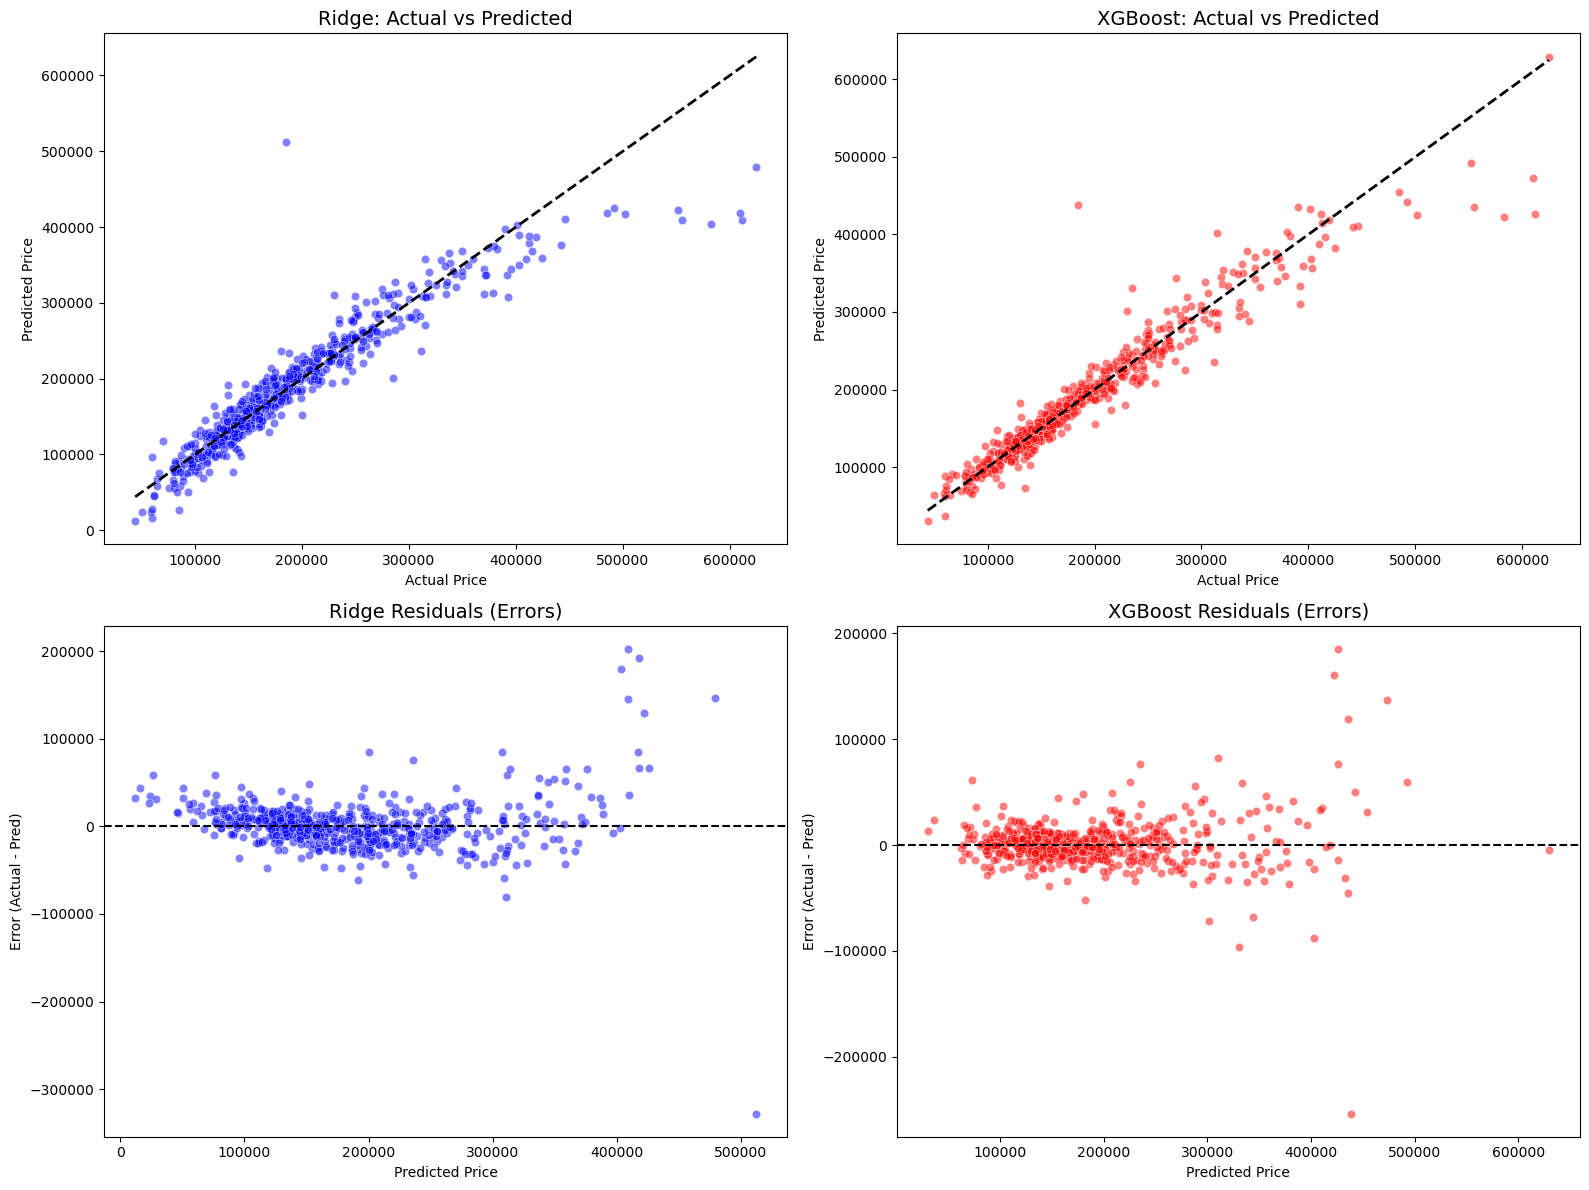

In [126]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x=y_test, y=ridge_test_pred, alpha=0.5, color='blue', ax=axes[0,0])
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal Line
axes[0,0].set_title("Ridge: Actual vs Predicted", fontsize=14)
axes[0,0].set_xlabel("Actual Price")
axes[0,0].set_ylabel("Predicted Price")

sns.scatterplot(x=y_test, y=xgb_test_pred, alpha=0.5, color='red', ax=axes[0,1])
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0,1].set_title("XGBoost: Actual vs Predicted", fontsize=14)
axes[0,1].set_xlabel("Actual Price")
axes[0,1].set_ylabel("Predicted Price")

ridge_residuals = y_test - ridge_test_pred
xgb_residuals = y_test - xgb_test_pred

sns.scatterplot(x=ridge_test_pred, y=ridge_residuals, alpha=0.5, color='blue', ax=axes[1,0])
axes[1,0].axhline(0, color='black', linestyle='--') # Zero Error Line
axes[1,0].set_title("Ridge Residuals (Errors)", fontsize=14)
axes[1,0].set_xlabel("Predicted Price")
axes[1,0].set_ylabel("Error (Actual - Pred)")

sns.scatterplot(x=xgb_test_pred, y=xgb_residuals, alpha=0.5, color='red', ax=axes[1,1])
axes[1,1].axhline(0, color='black', linestyle='--')
axes[1,1].set_title("XGBoost Residuals (Errors)", fontsize=14)
axes[1,1].set_xlabel("Predicted Price")
axes[1,1].set_ylabel("Error (Actual - Pred)")

plt.tight_layout()
plt.show()

# 4 Predicting Prices

In [146]:
random_positions = np.random.choice(len(x_test), 5, replace=False)

actual_prices = y_test.iloc[random_positions]
xgb_input = x_test.iloc[random_positions]
ridge_input = x_test_scaled.iloc[random_positions]

In [147]:
xgb_predicted_prices = best_xgb.predict(xgb_input)
ridge_predicted_prices = best_ridge.predict(ridge_input)

In [148]:
comparison_df = pd.DataFrame({
    'Actual Price': actual_prices.values, 
    'XGB Prediction': xgb_predicted_prices,
    'Ridge Prediction': ridge_predicted_prices,
    'XGB Difference ($)': xgb_predicted_prices - actual_prices.values,
    'Ridge Difference ($)': ridge_predicted_prices - actual_prices.values,
    'XGB Error %': (abs(xgb_predicted_prices - actual_prices.values) / actual_prices.values) * 100,
    'Ridge Error %': (abs(ridge_predicted_prices - actual_prices.values) / actual_prices.values) * 100
})

In [149]:
print('-'*50,"\n-Real-World Prediction Test (5 Random Houses)",'-'*50)
print(comparison_df)

-------------------------------------------------- 
-Real-World Prediction Test (5 Random Houses) --------------------------------------------------
   Actual Price  XGB Prediction  Ridge Prediction  XGB Difference ($)  \
0        147000      158,540.28        157,946.49           11,540.28   
1        165500      179,346.89        197,291.51           13,846.89   
2        262280      243,610.55        253,233.46          -18,669.45   
3        370000      366,577.03        311,703.95           -3,422.97   
4        170000      159,442.91        164,982.93          -10,557.09   

   Ridge Difference ($)  XGB Error %  Ridge Error %  
0             10,946.49         7.85           7.45  
1             31,791.51         8.37          19.21  
2             -9,046.54         7.12           3.45  
3            -58,296.05         0.93          15.76  
4             -5,017.07         6.21           2.95  


# Summary

 - Based on the score results and the visual evidence from the graphs, the Tuned XGBoost model is conclusively the superior choice for house price prediction in this project. The score table confirms its dominance with a Test RMSE of 24,300 and an R^2 of 0.93, significantly outperforming the Ridge model's Test RMSE of $30,290. The visual evidence from the Actual vs. Predicted graph (red dots) shows XGBoost's predictions clinging tightly to the line of perfect fit, particularly in the high-value ranges where the Ridge model (blue dots) visibly begins to underestimate prices. Furthermore, the Residual Plot indicates that while XGBoost has a larger overall error gap, its remaining errors are randomly distributed around the zero line, unlike the Ridge model, which displays a problematic "megaphone" pattern, signaling that its errors become predictably worse as the predicted price increases. In conclusion, the higher predictive accuracy and more reliable error distribution solidify the Tuned XGBoost model as the final selection.